In [165]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [166]:
# STEP 2: LOAD DATASET
# Reason: The dataset is stored on Google Drive; we mount it to access the CSV file.
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
# STEP 3: INITIAL INSPECTION
# Reason: Basic checks to understand dimensions, structure, and summary stats of the data.

In [168]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [169]:
df.shape

(2930, 82)

In [170]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [172]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [173]:
# STEP 4: MISSING VALUE ANALYSIS
# Reason: Identify columns with highest missing data
# These will be either dropped or imputed depending on business logic or data availability.

In [174]:
df.isnull().sum().sort_values(ascending = False).head(30)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Yr Blt,159
Garage Cond,159


In [175]:
# STEP 5: DROP HIGH-NULL COLUMNS
# Reason: Columns like 'Pool QC', 'Fence', etc., have too many missing values with little usable data.
df.drop(['Fence','Alley','Misc Feature','Pool QC'], axis=1, inplace=True)

In [176]:
# STEP 6: IMPUTE OR HANDLE REMAINING NULLS
# Reason: Logical imputation for garage and basement-related features.

In [177]:
df['Mas Vnr Type'].unique()

array(['Stone', nan, 'BrkFace', 'BrkCmn', 'CBlock'], dtype=object)

In [178]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('none')

In [179]:
df['Fireplace Qu'].unique()

array(['Gd', nan, 'TA', 'Po', 'Ex', 'Fa'], dtype=object)

In [180]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('none')

In [181]:
df['Lot Frontage'].unique()

array([141.,  80.,  81.,  93.,  74.,  78.,  41.,  43.,  39.,  60.,  75.,
        nan,  63.,  85.,  47., 152.,  88., 140., 105.,  65.,  70.,  26.,
        21.,  53.,  24., 102.,  98.,  83.,  94.,  95.,  90.,  79., 100.,
        44., 110.,  61.,  36.,  67., 108.,  59.,  92.,  58.,  56.,  73.,
        72.,  84.,  76.,  50.,  55.,  68., 107.,  25.,  30.,  57.,  40.,
        77., 120., 137.,  87., 119.,  64.,  96.,  71.,  69.,  52.,  51.,
        54.,  86., 124.,  82.,  38.,  48.,  89.,  66.,  45.,  35., 129.,
        31.,  42.,  28.,  99., 104.,  97., 103.,  34., 117., 149., 122.,
        62., 174., 106., 112.,  32., 115., 128.,  91.,  33., 121., 144.,
       130., 109., 150., 113., 125., 101.,  46., 114., 135., 136.,  37.,
        22., 313.,  49., 123., 160., 195., 118., 134., 182., 116., 138.,
       155., 126., 200., 168., 111., 131., 153., 133.])

In [182]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())

In [183]:
df['Garage Cond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [184]:
df['Garage Cond'] = df['Garage Cond'].fillna('Ng')

In [185]:
df['Garage Qual'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [186]:
df['Garage Qual'] = df['Garage Qual'].fillna('Ng')

In [187]:
df['Garage Yr Blt'].unique()

array([1960., 1961., 1958., 1968., 1997., 1998., 2001., 1992., 1995.,
       1999., 1993., 1990., 1985., 2003., 1988., 2010., 1951., 1978.,
       1977., 1974., 2000., 1970., 1971.,   nan, 1975., 2009., 2008.,
       2005., 2004., 2002., 2006., 1996., 1994., 1980., 1979., 1984.,
       1986., 1920., 1987., 1973., 1963., 1962., 1976., 1967., 1972.,
       1966., 1964., 1950., 1949., 1954., 1955., 1959., 1957., 1956.,
       1952., 1953., 1989., 1948., 1900., 1927., 1915., 1945., 1940.,
       1938., 1928., 1930., 1926., 1939., 1942., 1923., 1917., 1910.,
       1965., 1969., 1947., 1946., 1941., 1924., 1922., 1896., 2007.,
       1983., 1981., 1991., 1982., 1916., 1925., 1936., 1935., 1931.,
       1934., 1929., 1918., 1921., 1937., 1932., 1906., 1908., 1895.,
       1933., 2207., 1914., 1943., 1919.])

In [188]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [189]:
df['Garage Finish'].unique()

array(['Fin', 'Unf', 'RFn', nan], dtype=object)

In [190]:
df['Garage Finish'] = df['Garage Finish'].fillna('Ng')

In [191]:
df['Garage Type'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', nan, 'CarPort', '2Types'],
      dtype=object)

In [192]:
df['Garage Type'] = df['Garage Type'].fillna('Ng')

In [193]:
df.dropna(inplace=True)  # Remaining few rows are dropped

In [194]:
# STEP 7: CORRELATION + MULTICOLLINEARITY ANALYSIS
# Reason: Drop redundant highly correlated features using Pearson correlation and VIF

In [195]:
cf = df.corr(method='pearson', numeric_only=True)['SalePrice'].abs().sort_values(ascending=True)

In [196]:
cf = cf[cf < 0.1].index.to_list()

In [197]:
cf

['BsmtFin SF 2',
 'Misc Val',
 'Yr Sold',
 'Mo Sold',
 'Order',
 '3Ssn Porch',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 'Pool Area',
 'MS SubClass',
 'Kitchen AbvGr']

In [198]:
df.drop(columns=cf, inplace=True)

In [199]:
# VIF analysis to remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [200]:
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice'])

In [201]:
X = X.drop(columns=['Id'], errors='ignore')
X_const = add_constant(X)

In [202]:
vif_data = pd.DataFrame()

In [203]:
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]

In [204]:
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
13,Gr Liv Area,122.529432
12,2nd Flr SF,89.303867
11,1st Flr SF,77.473818
10,Total Bsmt SF,11.674712
8,BsmtFin SF 1,8.062407
9,Bsmt Unf SF,7.500707
21,Garage Cars,6.229790
22,Garage Area,5.481954
18,TotRms AbvGrd,4.056838
5,Year Built,4.003149


In [205]:
df.drop(columns = ['Gr Liv Area', 'Total Bsmt SF', 'Bsmt Unf SF',
                   '1st Flr SF', '2nd Flr SF', 'BsmtFin SF 1'], inplace=True)

In [206]:
df['PID'].unique()

array([526301100, 526350040, 526351010, ..., 923400125, 924100070,
       924151050])

In [207]:
df.drop(columns = ['PID'], inplace=True)

In [208]:
# STEP 8: CATEGORICAL VALUE CLEANUP
# Reason: Grouping rare values as 'Other' to avoid too many one-hot columns

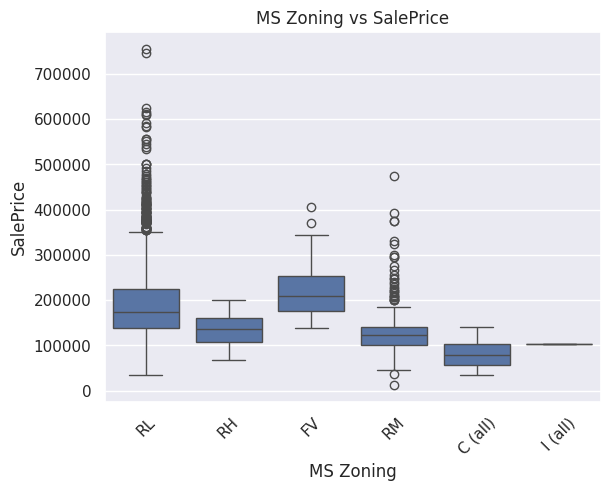

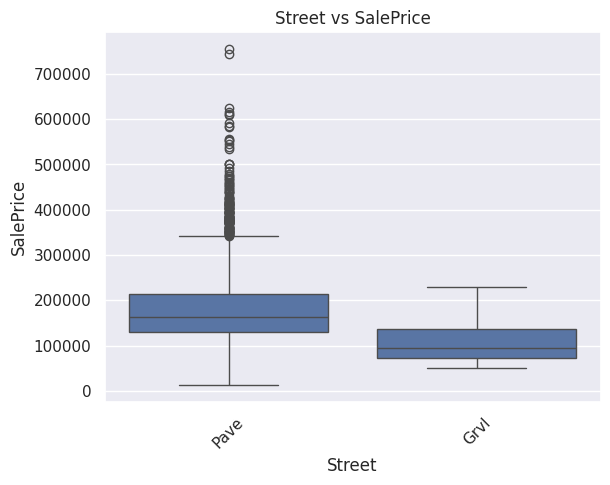

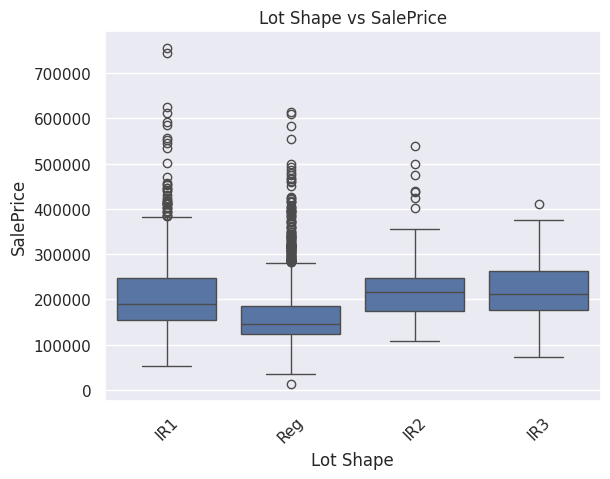

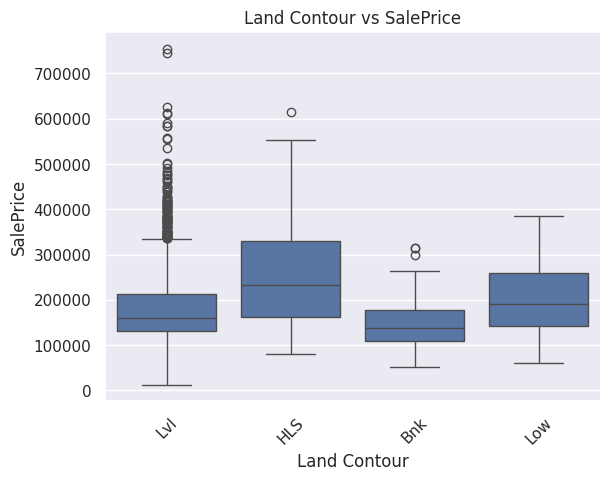

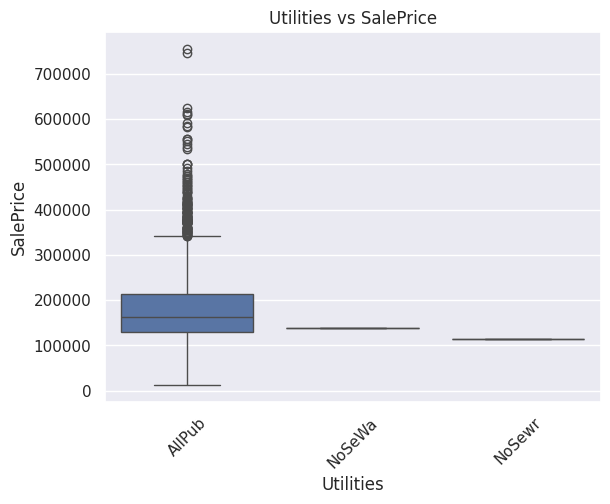

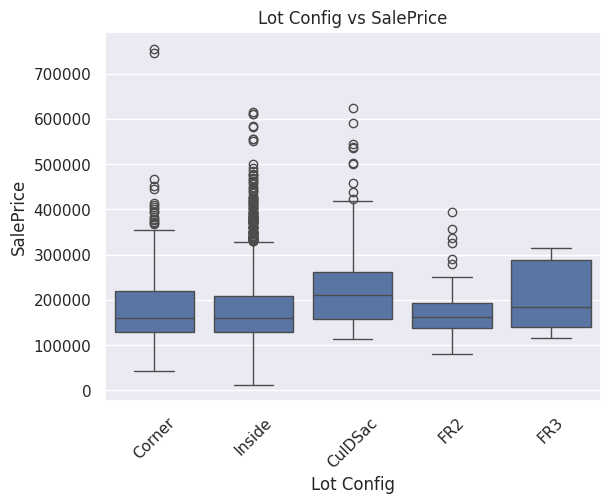

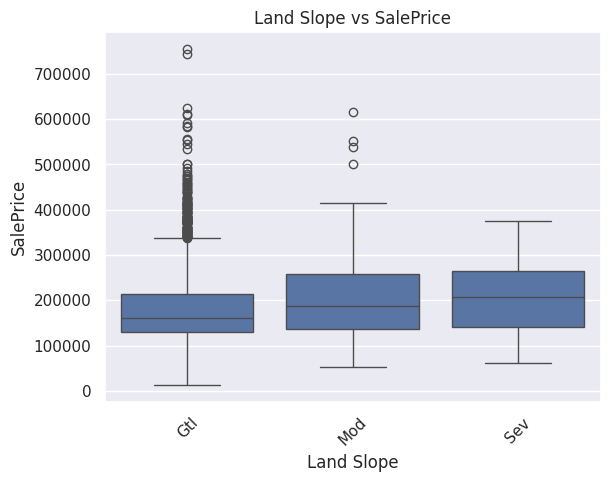

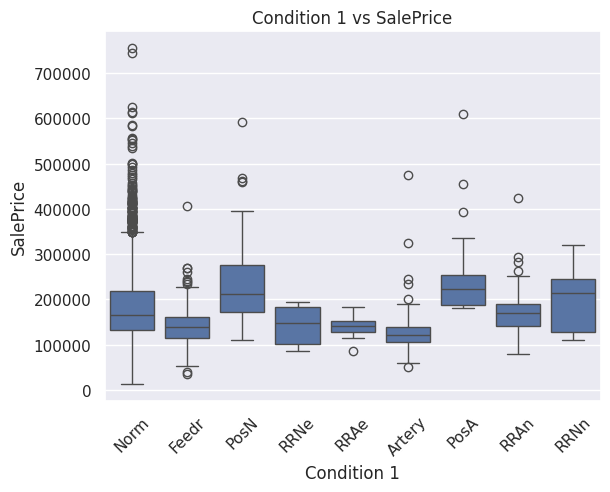

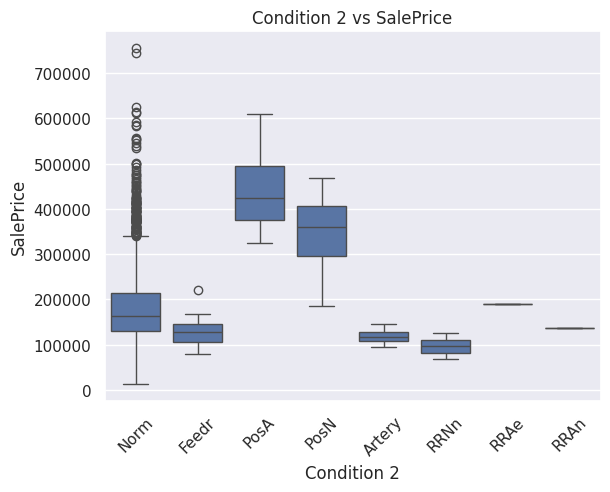

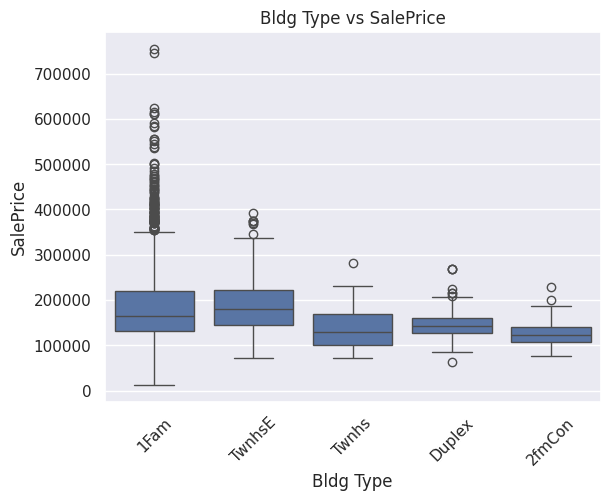

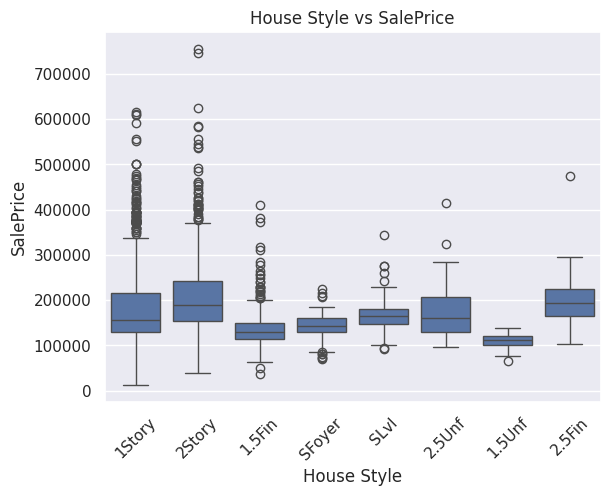

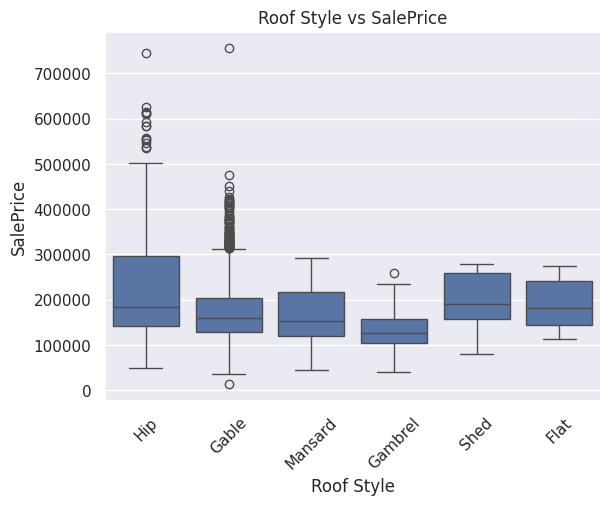

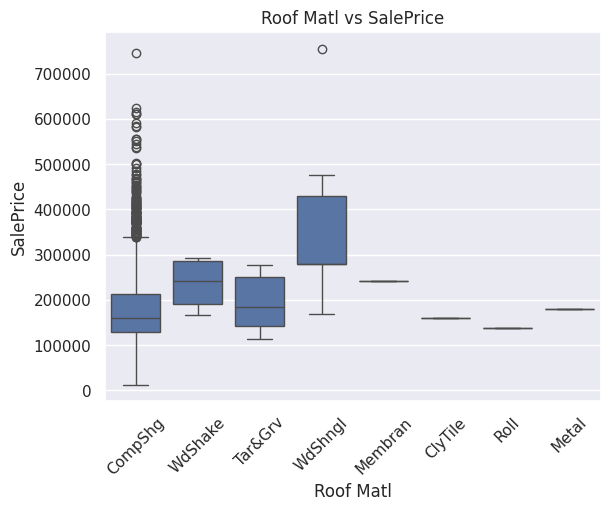

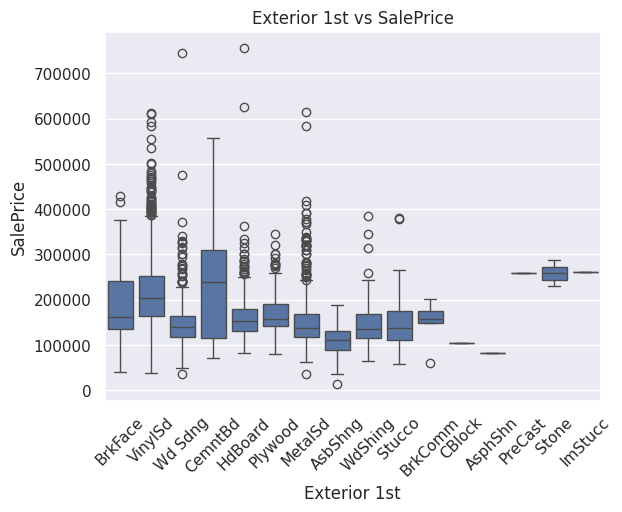

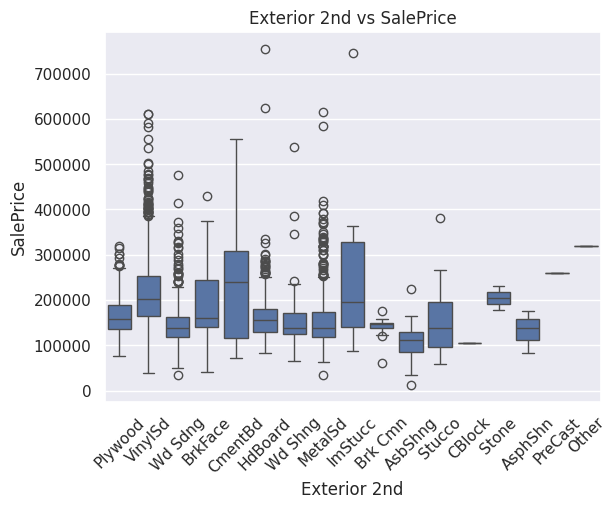

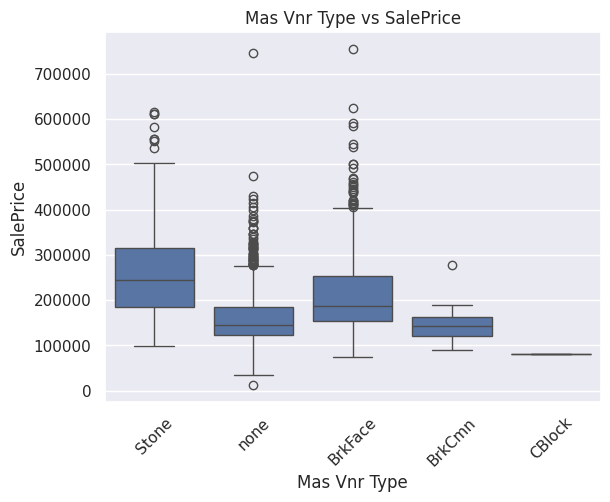

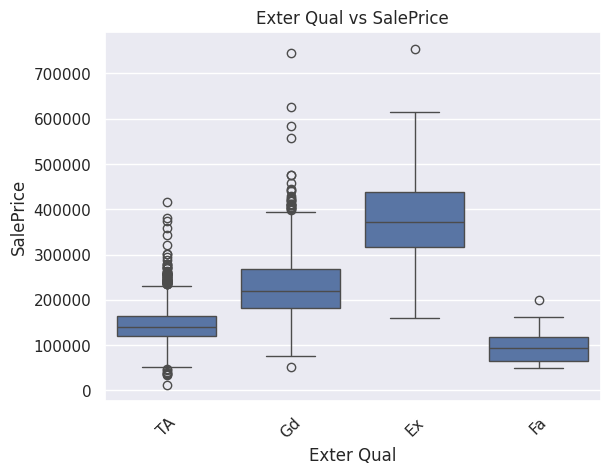

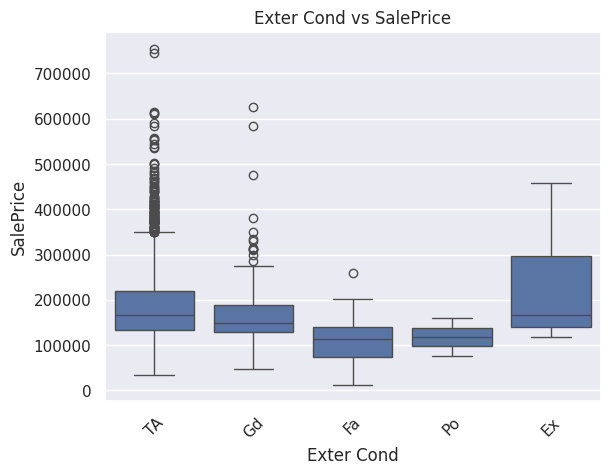

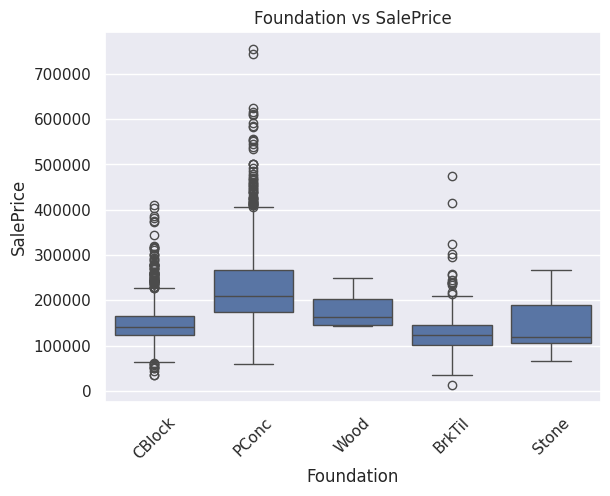

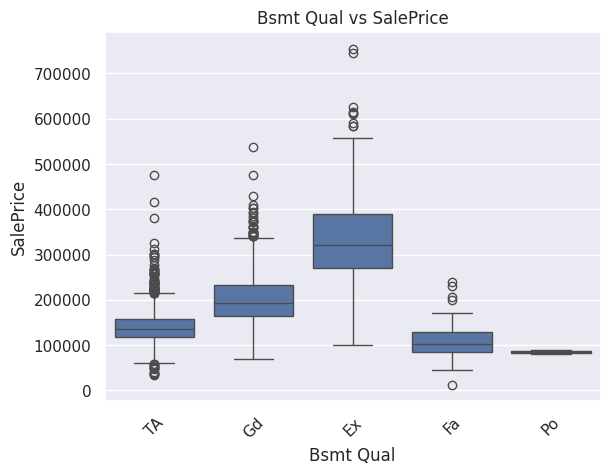

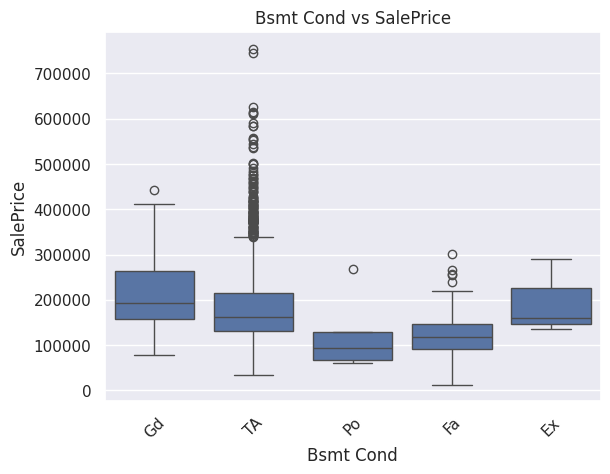

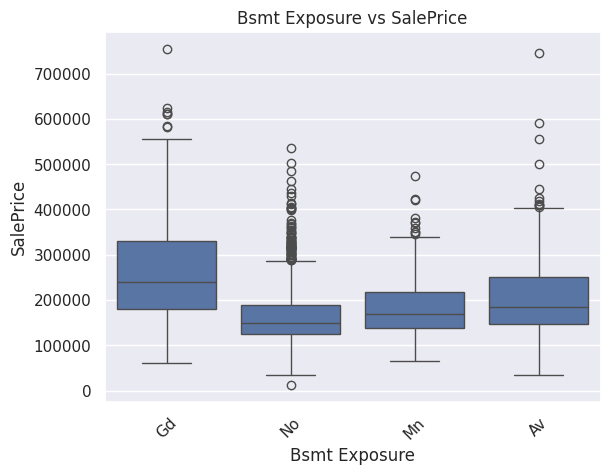

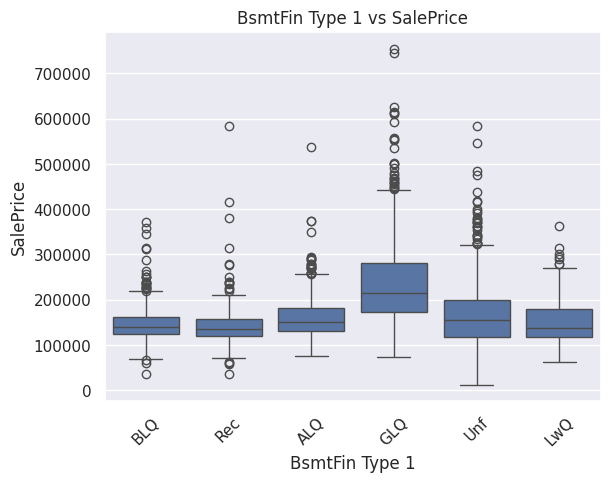

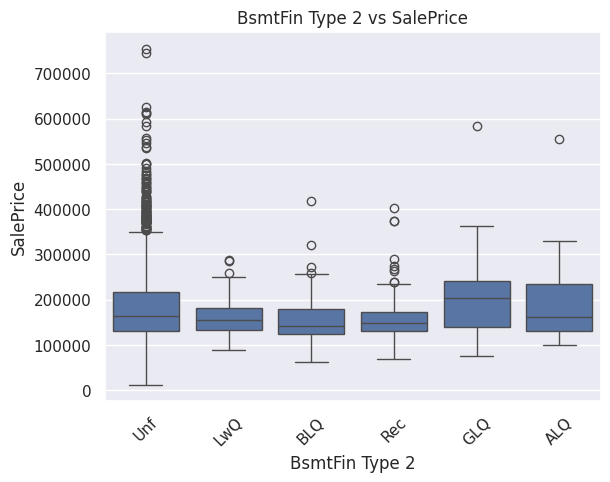

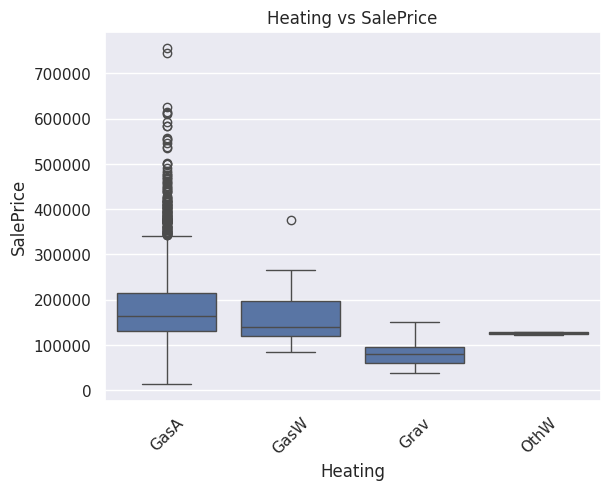

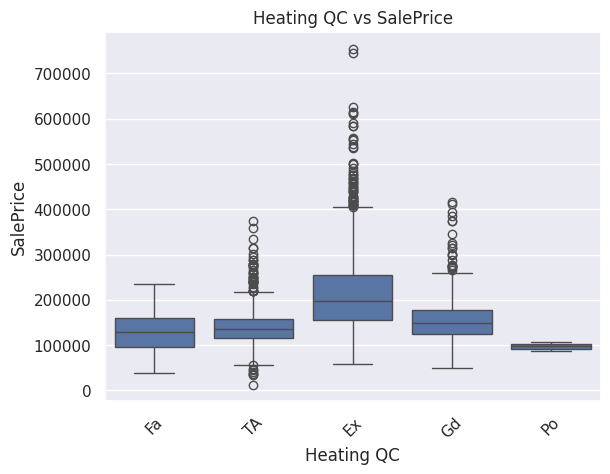

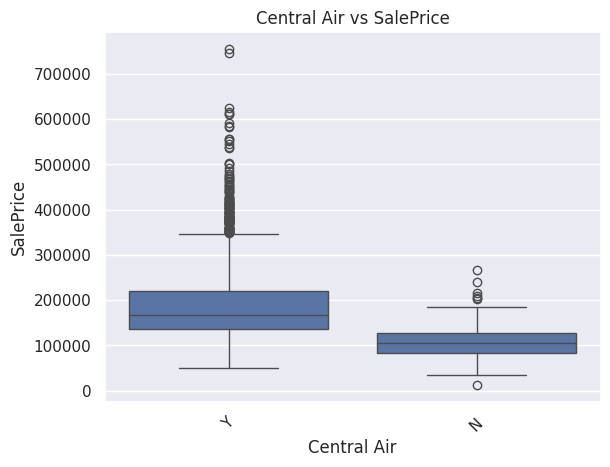

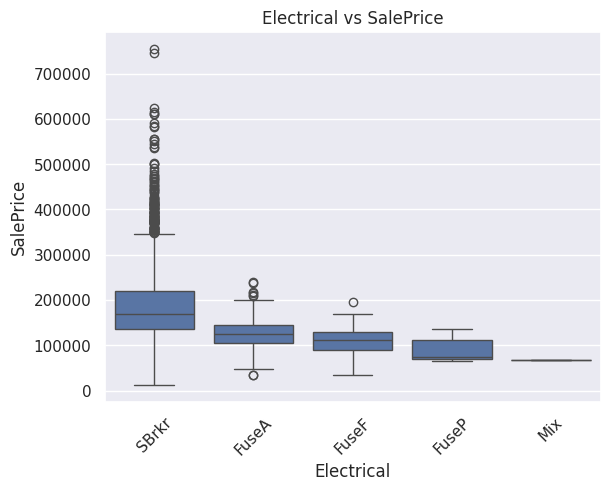

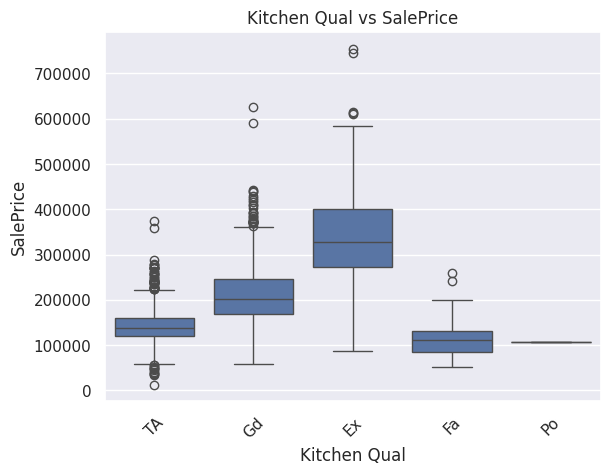

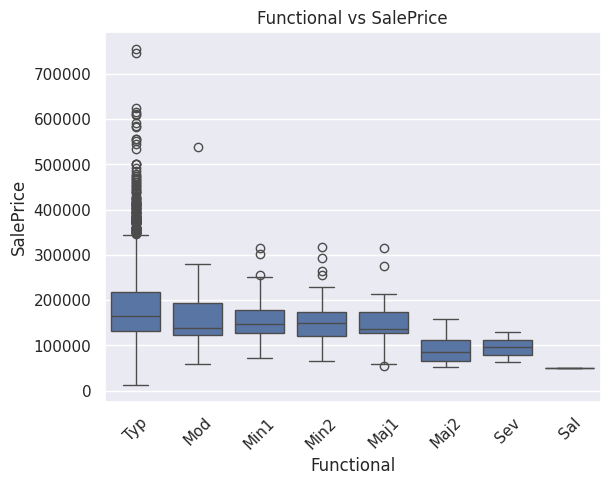

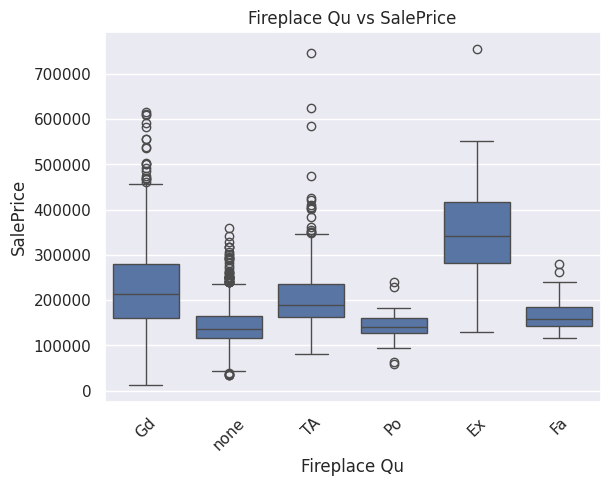

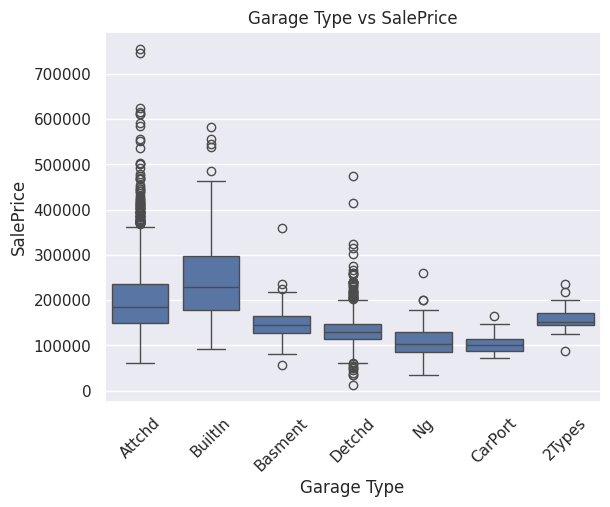

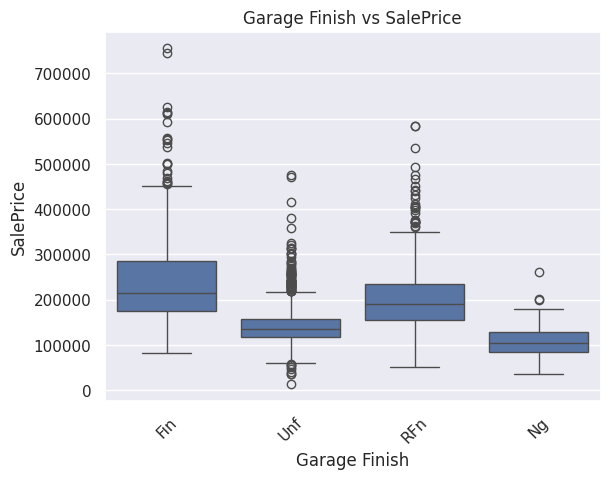

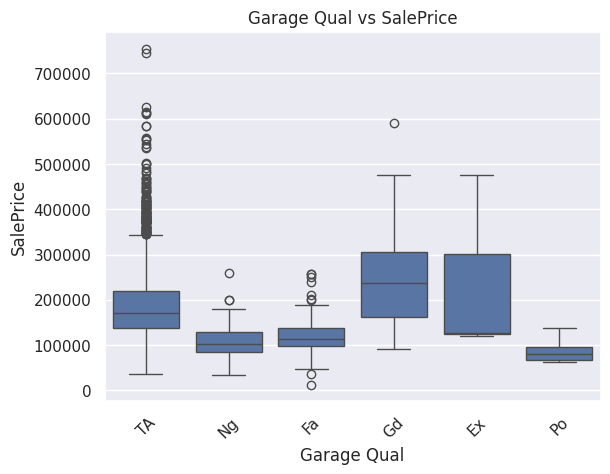

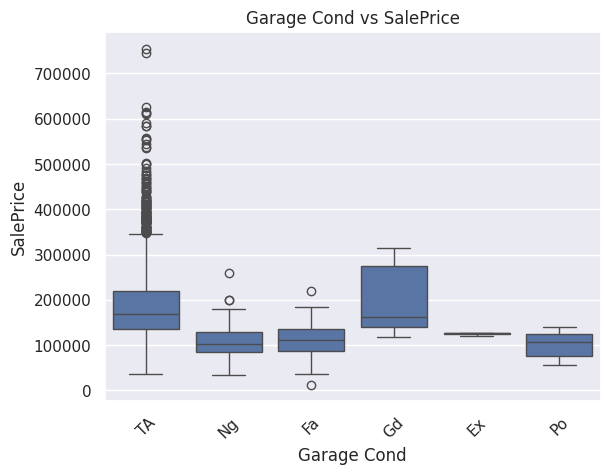

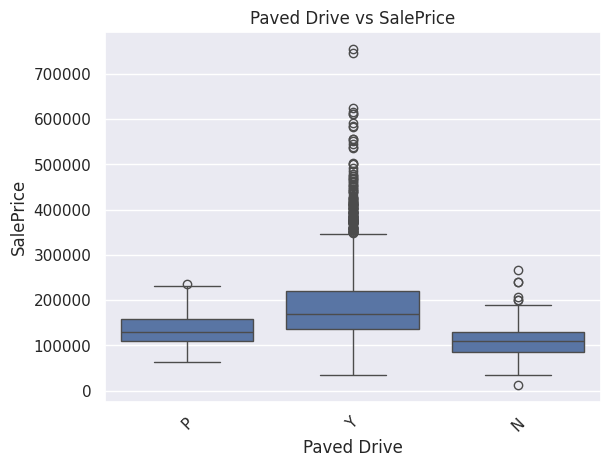

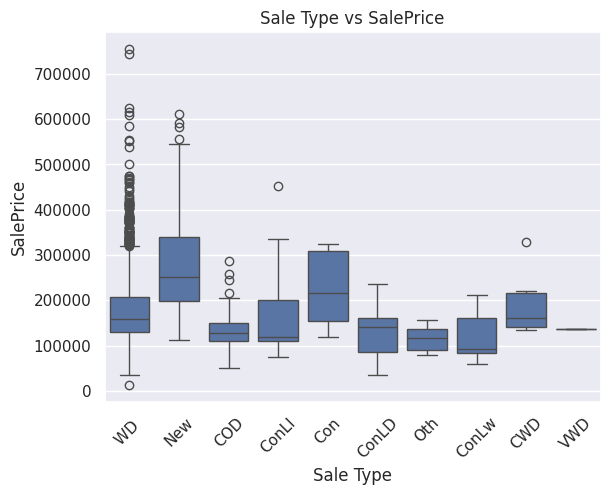

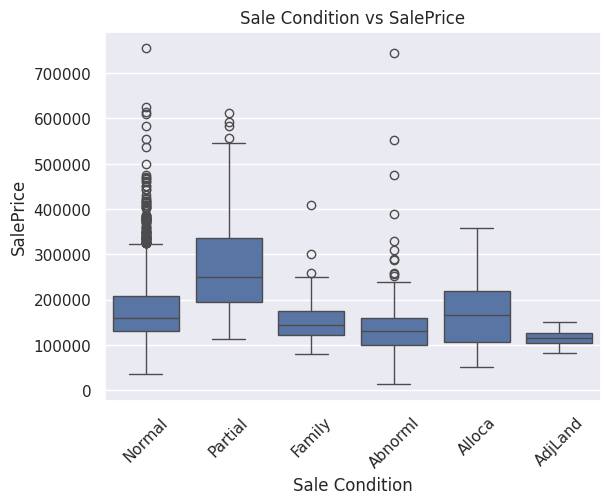

In [209]:
for col in df.select_dtypes(include = 'object').columns:
  if df[col].nunique() <20:
    sns.boxplot(x=col,y='SalePrice', data = df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs SalePrice')
    plt.show()


In [210]:
df.drop(columns=['Utilities'],inplace = True) # Most of the values are AllPub

In [211]:
df['Roof Matl'].value_counts()

,count
Roof Matl,
CompShg,2780
Tar&Grv,21
WdShake,9
WdShngl,7
Membran,1
ClyTile,1
Roll,1
Metal,1


In [212]:
df['Roof Matl'] = df['Roof Matl'].apply(lambda x:x if x in ['CompShg','WdShake','Tar&Grv','WdShngl'] else 'other')

In [213]:
values = df['Exterior 1st'].value_counts() # Grouped all with count less than 2 into other

In [214]:
values

,count
Exterior 1st,
VinylSd,994
MetalSd,437
HdBoard,431
Wd Sdng,404
Plywood,210
CemntBd,123
BrkFace,80
WdShing,52
Stucco,40


In [215]:
df['Exterior 1st'] = df['Exterior 1st'].apply(lambda x:"other" if x in values[values<2] else x)

In [216]:
values = df['Exterior 2nd'].value_counts()

In [217]:
values

,count
Exterior 2nd,
VinylSd,982
MetalSd,434
HdBoard,395
Wd Sdng,380
Plywood,259
CmentBd,123
Wd Shng,76
Stucco,46
BrkFace,45


In [218]:
df['Exterior 2nd'] = df['Exterior 2nd'].apply(lambda x : 'Other' if x in values[values<4] else x)  # Grouped all with count less than 4 into other

In [219]:
# STEP 9: TRANSFORM TARGET VARIABLE

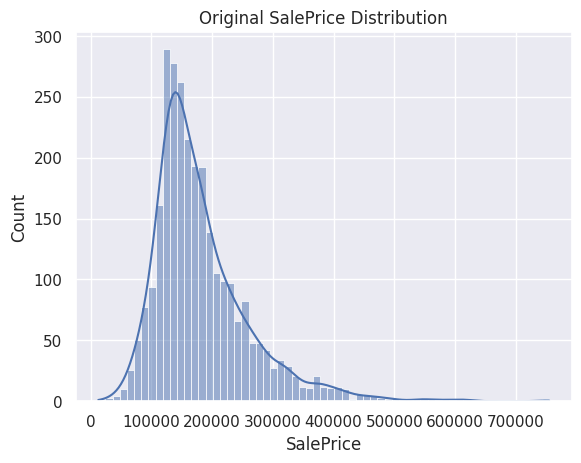

In [220]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")
plt.show()

In [221]:
# Reason: 'SalePrice' is right-skewed. Log transformation improves linear model assumptions.
df['SalePrice'] = np.log1p(df['SalePrice'])

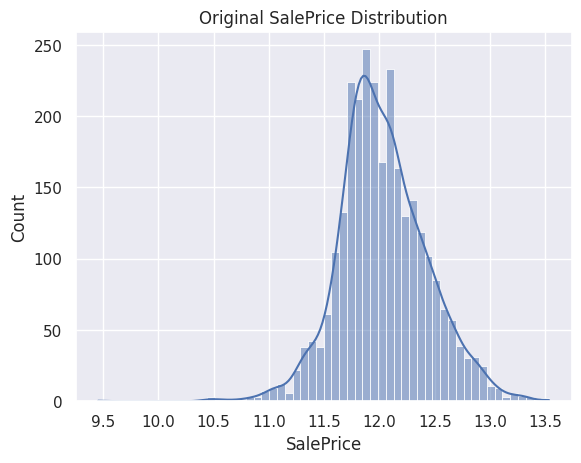

In [222]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")
plt.show()

In [223]:
# STEP 10: ENCODING + SPLIT
# Reason: Convert categoricals to dummies. Split train/test.
from sklearn.model_selection import train_test_split

cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice']).columns

In [224]:
df = pd.get_dummies(columns=cat_cols, data=df, drop_first=True)

In [225]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [227]:
# STEP 11: SCALING
# Reason: Required for linear models to prevent feature dominance

from sklearn.preprocessing import StandardScaler

In [228]:
sc = StandardScaler()
x_train[num_cols] = sc.fit_transform(x_train[num_cols])
x_test[num_cols] = sc.transform(x_test[num_cols])

In [229]:
# STEP 12: MODELING AND EVALUATION
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [230]:
# Linear Regression
model = LinearRegression()

In [231]:
model.fit(x_train, y_train)

LinearRegression()

In [232]:
pred = model.predict(x_test)

In [233]:
y_pred_actual = np.expm1(pred)
y_test_actual = np.expm1(y_test)

In [234]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

In [235]:
rmse,r2

(np.float64(28649.881226861038), 0.8830400244558345)

In [236]:
# Ridge
rd = Ridge()

In [237]:
rd.fit(x_train, y_train)

Ridge()

In [238]:
pred = rd.predict(x_test)

In [239]:
y_pred_r = np.expm1(pred)

In [240]:
rmse = np.sqrt(mean_squared_error(y_pred_r, y_test_actual))
r2 = r2_score(y_pred_r, y_test_actual)

In [241]:
rmse,r2

(np.float64(28164.160354755157), 0.865917075854916)

In [242]:
#Lasso
ls=Lasso()

In [243]:
ls.fit(x_train,y_train)

Lasso()

In [244]:
pred = ls.predict(x_test)

In [245]:
y_pred_l = np.expm1(pred)

In [246]:
rmse = np.sqrt(mean_squared_error(y_pred_l,y_test_actual))
r2 = r2_score(y_pred_l,y_test_actual)

In [247]:
rmse,r2  # the values are bad because we have set the alpha = 1.0

(np.float64(85460.91774379213), -2.1556329317785358e+30)

In [248]:
# Lasso + CV tuning
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5)

In [249]:
lasso_cv.fit(x_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-0...
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00]),
        cv=5)

In [250]:
y_pred = np.expm1(lasso_cv.predict(x_test))

In [251]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

In [252]:
lasso_cv.alpha_

np.float64(0.0003727593720314938)

In [253]:
rmse,r2

(np.float64(27264.202856191336), 0.894080181986042)

In [254]:
# Random Forest
rf = RandomForestRegressor()

In [255]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [256]:
pred = rf.predict(x_test)

In [257]:
pred_r = np.expm1(pred)

In [258]:
rmse = np.sqrt(mean_squared_error(pred_r, y_test_actual))
r2 = r2_score(pred_r, y_test_actual)

In [259]:
rmse,r2

(np.float64(32725.913538370845), 0.7865847664687391)

In [260]:
# Compared to all model lasso has the best metrics
#Lasso GridSearchCV tuning

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
alpha_range = np.linspace(0.0001, 0.001, 10)
lasso_grid = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid={'alpha': alpha_range},
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

In [263]:
lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])},
             scoring='neg_root_mean_squared_error')

In [264]:
best_lasso = lasso_grid.best_estimator_

In [265]:
y_pred = np.expm1(best_lasso.predict(x_test))

In [266]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

In [267]:
rmse,r2

(np.float64(27273.659969527987), 0.894006688588303)